In [2]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score

In [3]:
BATCH_SIZE = 32

In [4]:
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

In [5]:
image, label = train_data[0]

In [6]:
image.shape

torch.Size([1, 28, 28])

In [7]:
classes = train_data.classes
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

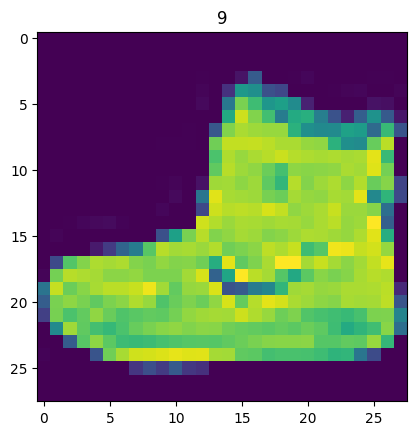

In [8]:
plt.title(label)
plt.imshow(image.squeeze())

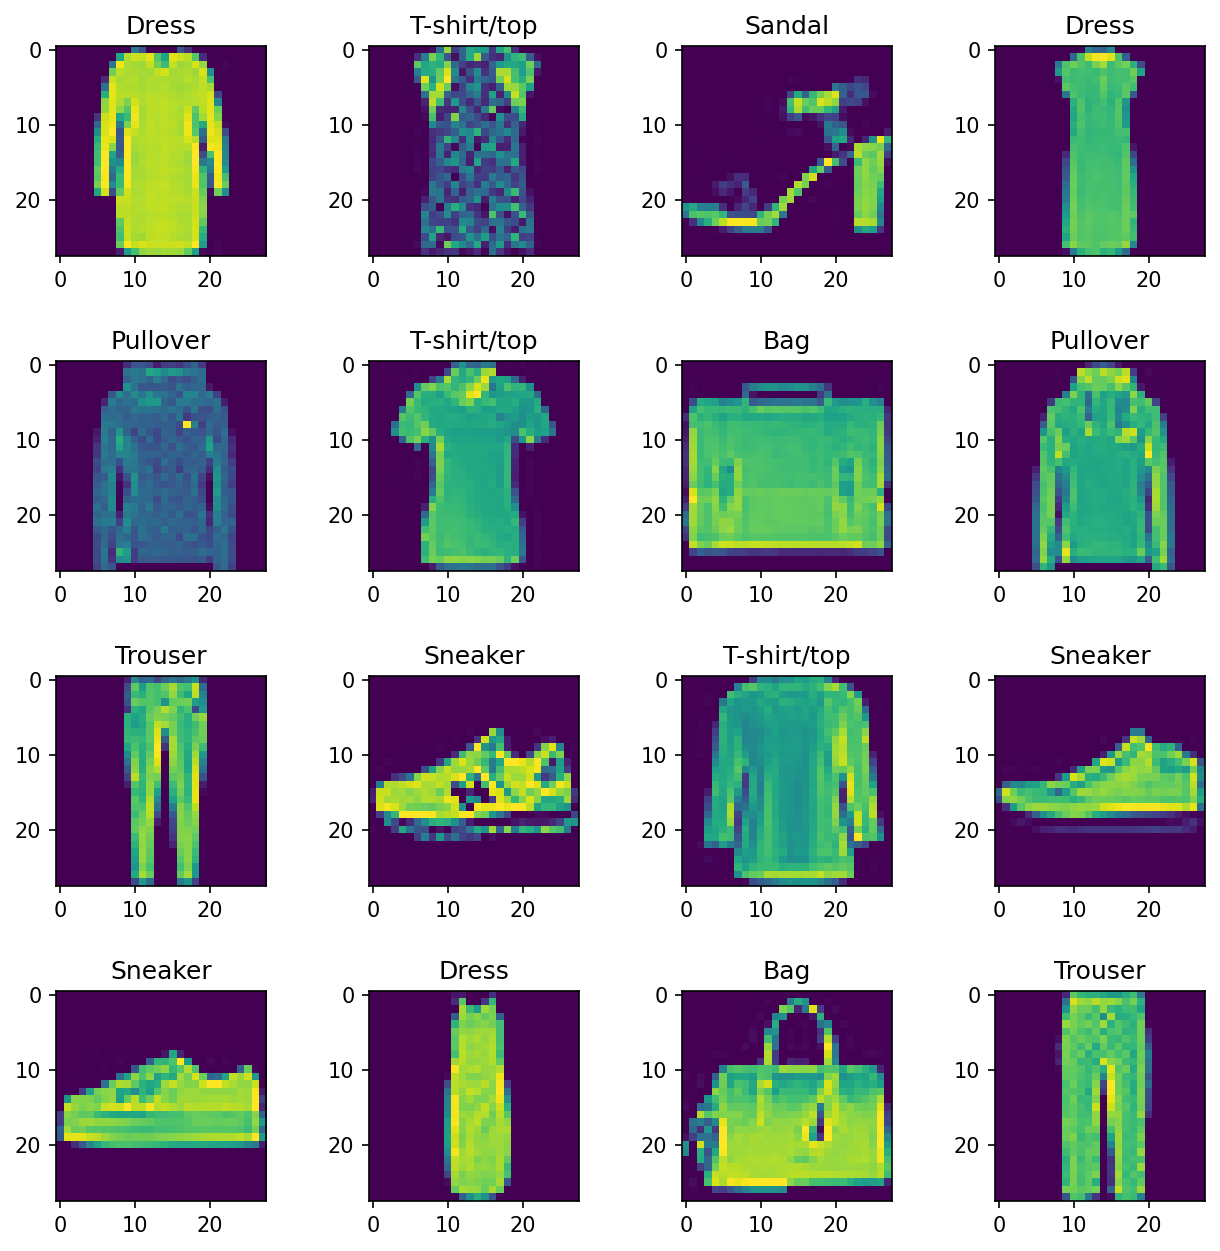

In [9]:
torch.manual_seed(101)
fig = plt.figure(figsize=[10, 10], dpi=150)
plt.subplots_adjust(wspace=0.4, hspace=0.5)

n_rows, n_cols = 4, 4
for i in range(1, n_cols*n_rows + 1):
    random_ind = torch.randint(1, len(train_data), size=(1, )).item()
    image, label = train_data[random_ind]
    plt.subplot(n_rows, n_cols, i)
    plt.imshow(image.squeeze())
    plt.title(classes[label])

In [10]:
train_batches = DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_batches = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)


In [11]:
train_features_batch, train_labels_batch = next(iter(train_batches))
test_features_batch, test_labels_batch = next(iter(train_batches))

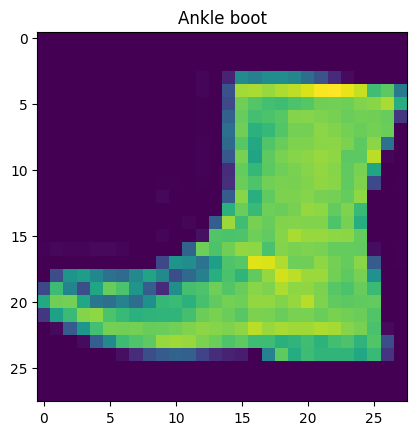

In [12]:
torch.manual_seed(101)
random_ind = torch.randint(0, len(train_features_batch), size=(1, )).item()

plt.title(classes[train_labels_batch[random_ind]])
plt.imshow(train_features_batch[random_ind].squeeze())

# Creating Model

In [13]:
class FashionMNIST(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features, hidden_features),
            nn.ReLU(),
            nn.Linear(hidden_features, out_features)  # Adjust this to match the number of classes in your task
        )
        
    def forward(self, x):
        return self.network(x)

In [14]:
model = FashionMNIST(in_features=28*28, hidden_features=30, out_features=len(classes))

In [15]:
dummy_input = torch.randn(1, 1, 28, 28)

with torch.no_grad():
    output = model(dummy_input)
print(output.shape)

torch.Size([1, 10])


In [16]:
loss_fn = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(
    model.parameters(),
    lr=0.01
)

In [17]:
len(train_batches)

1875

# Training Model

In [18]:
torch.manual_seed(101)

for epoch in range(20):
    train_loss = 0
    train_acc = 0
    for batch, (X, y) in enumerate(train_batches):
        model.train()
        y_pred = model(X)
        
        loss = loss_fn(y_pred, y)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch == 1000:
            y = y.detach().numpy()
            y_pred = y_pred.argmax(dim=1).detach().numpy()
            train_loss = loss
            train_acc = accuracy_score(y, y_pred)

    if epoch % 5 == 0:
        print(f'loss: {train_loss} \n accuracy: {train_acc}')

loss: 0.6276228427886963 
 accuracy: 0.8125
loss: 0.2885207235813141 
 accuracy: 0.9375
loss: 0.4020719826221466 
 accuracy: 0.8125
loss: 0.45916658639907837 
 accuracy: 0.8125


# Evaluating Model

In [19]:
torch.manual_seed(101)

with torch.inference_mode():
    test_loss = 0
    test_acc = 0
    for batch, (X, y) in enumerate(test_batches):
        model.eval()
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        y_pred = y_pred.argmax(dim=1).detach().numpy()
        y = y.detach().numpy()
        test_loss += loss
        test_acc += accuracy_score(y, y_pred)
    print(test_loss / len(test_batches))
    print(test_acc / len(test_batches))

tensor(0.3805)
0.8644169329073482
